# Group Project: Crime Rate Exploration

Scientific Question:  How have crime rates changed across age groups over the last decade? 

# Explore Robbery Data

In [105]:
#import all necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Get FBI API Key
API_KEY = api_keys.fbi_api_key

# base url for getting api data
base_url = "https://api.usa.gov/crime/fbi/sapi/"
#Create a list of states in order to request data from each state
stateAbbr = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
#declare the offense that we want to explore
offense = ['robbery',''
#Create a list of variables that we want to explore data for. In this case male and females
variable = ['male','female']
#declare the start and end year for the time period that we want to look at
since = '2010'
until = '2019'

#create an empty dataframe
robbery_data = pd.DataFrame(columns=[])

#Create a for loop to request data for each state and for each variable for the offense that we would like to look at.
for i in stateAbbr:
    for j in variable:
        desired_endpoint = "api/arrest/states/" + i + '/' + offense + '/' + j + '/' + since + '/' + until
        req = requests.get(base_url + desired_endpoint+'?api_key='+API_KEY).json()
        new = pd.DataFrame(req["data"])
        #Create new columns in the dataframe so that we know what data corresponds to each state and variable.
        new['State'] = i
        new['variable'] = j
        #Append the data from each request to the dataframe
        robbery_data = robbery_data.append(new)



In [107]:
robbery_data.head()

,value,data_year,month_num,key,State,variable
0,0,2010,0,10-12,AL,male
1,0,2011,0,10-12,AL,male
2,0,2012,0,10-12,AL,male
3,0,2013,0,10-12,AL,male
4,0,2014,0,10-12,AL,male


# Explore Robberies by Age Group for Entire US

In [146]:
# Explore Robberies by age group. 

Robberies_by_age = robbery_data.groupby("key")
#Robberies_by_age['value'].head()
total_robberies_per_age_group = Robberies_by_age['value'].sum()
#total_robberies_per_age_group.head()

summary_crimes_per_age = {"Total Robberies": total_robberies_per_age_group}
summarycrimes_per_age_df = pd.DataFrame(summary_crimes_per_age)
summarycrimes_per_age_df.index.name = 'Age Group'
summarycrimes_per_age_df.head()


,Total Robberies
Age Group,
10-12,4062
13-14,27724
15,33727
16,45594
17,52597


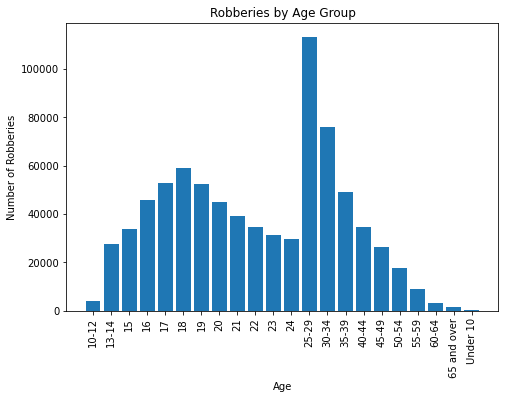

In [168]:
#Make a bar chart showing crimes per age group
#plot = summarycrimes_per_age_df.plot(kind='bar')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=summarycrimes_per_age_df.index
y=summarycrimes_per_age_df['Total Robberies']
ax.bar(x,y)
ax.set_title('Robberies by Age Group')
ax.set_ylabel("Number of Robberies")
ax.set_xlabel("Age")
plt.xticks(rotation=90)
plt.show()


# Explore Robberies By State

In [166]:
Robberies_by_state = robbery_data.groupby("State")
total_robberies_per_state = Robberies_by_state['value'].sum()
#total_robberies_per_age_group.head()

summary_crimes_per_state = {"Total Robberies": total_robberies_per_state}
summarycrimes_per_state_df = pd.DataFrame(summary_crimes_per_state)
summarycrimes_per_state_df.index.name = 'State'
summarycrimes_per_state_df.head()

,Total Robberies
State,
AK,2667
AL,5389
AR,5747
AZ,17823
CA,165015


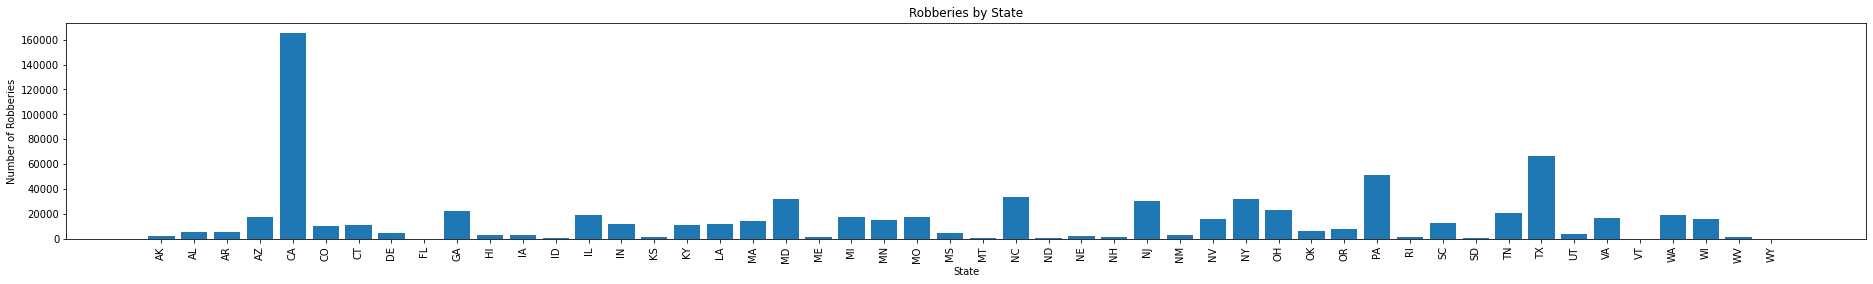

In [272]:
#Make a bar chart showing crimes per age group
#plot = summarycrimes_per_age_df.plot(kind='bar')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=summarycrimes_per_state_df.index
y=summarycrimes_per_state_df['Total Robberies']
ax.bar(x,y)
ax.set_title('Robberies by State')
ax.set_ylabel("Number of Robberies")
ax.set_xlabel("State")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (25,3)
plt.show()

# Normalize Number of Robberies by Population of Each State

In [211]:
#normalize number of robberies by average population
population_by_state = pd.read_csv('Population_By_State.csv')
population_by_state.columns = ['State','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
population_by_state.drop(population_by_state.index[0], inplace = True)
population_by_state['State']= stateAbbr
population_by_state.index = population_by_state['State']
population_by_state.drop('State', inplace=True, axis=1)
population_by_state.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,
AL,"4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"
AK,"713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
AZ,"6,407,172","6,472,643","6,554,978","6,632,764","6,730,413","6,829,676","6,941,072","7,044,008","7,158,024","7,278,717"
AR,"2,921,964","2,940,667","2,952,164","2,959,400","2,967,392","2,978,048","2,989,918","3,001,345","3,009,733","3,017,804"
CA,"37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223"


In [238]:
print(type(population_by_state.loc['AL']['2010']))
#Year_list=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
#Since data is in string format, remove the commas and convert each column to integer type
population_by_state['2010']=population_by_state['2010'].str.replace(',','')
population_by_state['2010'] = population_by_state['2010'].astype(int)
population_by_state['2011']=population_by_state['2011'].str.replace(',','')
population_by_state['2011'] = population_by_state['2011'].astype(int)
population_by_state['2012']=population_by_state['2012'].str.replace(',','')
population_by_state['2012'] = population_by_state['2012'].astype(int)
population_by_state['2013']=population_by_state['2013'].str.replace(',','')
population_by_state['2013'] = population_by_state['2013'].astype(int)
population_by_state['2014']=population_by_state['2014'].str.replace(',','')
population_by_state['2014'] = population_by_state['2014'].astype(int)
population_by_state['2015']=population_by_state['2015'].str.replace(',','')
population_by_state['2015'] = population_by_state['2015'].astype(int)
population_by_state['2016']=population_by_state['2016'].str.replace(',','')
population_by_state['2016'] = population_by_state['2016'].astype(int)
population_by_state['2017']=population_by_state['2017'].str.replace(',','')
population_by_state['2017'] = population_by_state['2017'].astype(int)
population_by_state['2018']=population_by_state['2018'].str.replace(',','')
population_by_state['2018'] = population_by_state['2018'].astype(int)
population_by_state['2019']=population_by_state['2019'].str.replace(',','')
population_by_state['2019'] = population_by_state['2019'].astype(int)
    


<class 'numpy.int32'>


In [284]:
#Find avg 10 year population of each state
pop_means['Avg Pop'] = pd.DataFrame(population_by_state.mean(axis=1))
#pop_means.head()
#Divide the summarycrimes_per_state_df by population by state to get crimes by state normalized by population
normalized_summary_crimes_per_state = pd.merge(summarycrimes_per_state_df, pop_means, on='State')
normalized_summary_crimes_per_state['Normalized Robberies'] = normalized_summary_crimes_per_state['Total Robberies']/normalized_summary_crimes_per_state['Avg Pop']
normalized_summary_crimes_per_state.loc['NY']['Normalized Robberies']

0.001647980379238443

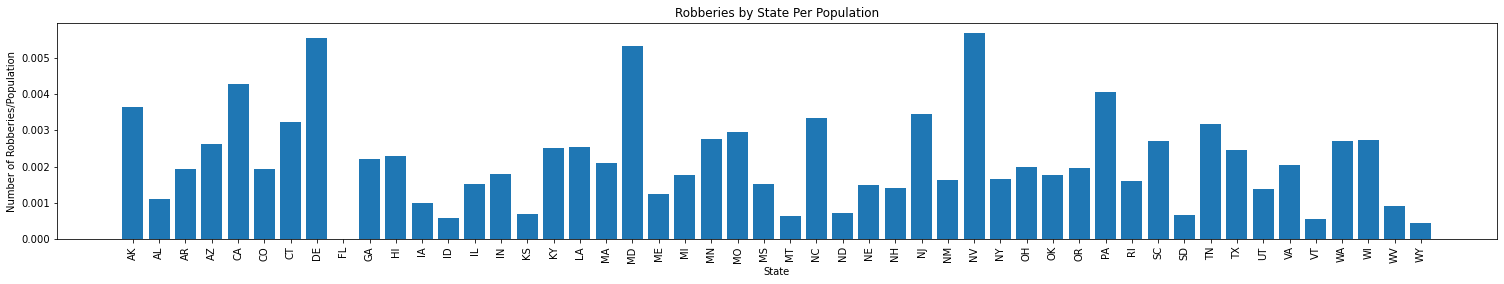

In [271]:
#Graph Robberies by State Normalized
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=normalized_summary_crimes_per_state.index
y=normalized_summary_crimes_per_state['Normalized Robberies']
ax.bar(x,y)
ax.set_title('Robberies by State Per Population')
ax.set_ylabel("Number of Robberies/Population")
ax.set_xlabel("State")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (25,3)
plt.show()

# Look at National trends in arrests for all crimes

In [342]:
#Pull data from the website on trends for all crimes

# base url for getting api data
base_url = "https://api.usa.gov/crime/fbi/sapi/"
#Create a list of states in order to request data from each state
stateAbbr = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
#Create a list of variables that we want to explore data for. In this case male and females
variable = 'all'
#declare the start and end year for the time period that we want to look at
since = '2010'
until = '2019'

#create an empty dataframe
crime_data = pd.DataFrame(columns=[])

#Create a for loop to request data for each state and for each variable for the offense that we would like to look at.
for i in stateAbbr:
    desired_endpoint = "api/arrest/states/offense/" + i + '/' + variable + '/' + since + '/' + until
    req = requests.get(base_url + desired_endpoint+'?api_key='+API_KEY).json()
    new = pd.DataFrame(req["data"])
    #Create new columns in the dataframe so that we know what data corresponds to each state and variable.
    new['State'] = i
    #Append the data from each request to the dataframe
    crime_data = crime_data.append(new)    

In [343]:
crime_data.head()

,value,data_year,month_num,key,State
0,2678,2010,0,Aggravated Assault,AL
1,4,2011,0,Aggravated Assault,AL
2,7,2012,0,Aggravated Assault,AL
3,10,2013,0,Aggravated Assault,AL
4,40,2014,0,Aggravated Assault,AL


In [344]:
#group data by year
crime_data_grouped_by_year = crime_data.groupby("data_year")
#find the sum of the values (arrested crimes) per year
sum_arrested_per_year = crime_data_grouped_by_year.sum()
sum_arrested_per_year.head()

,value,month_num
data_year,,
2010,10602026,0
2011,10012922,0
2012,9979508,0
2013,9613185,0
2014,9037194,0


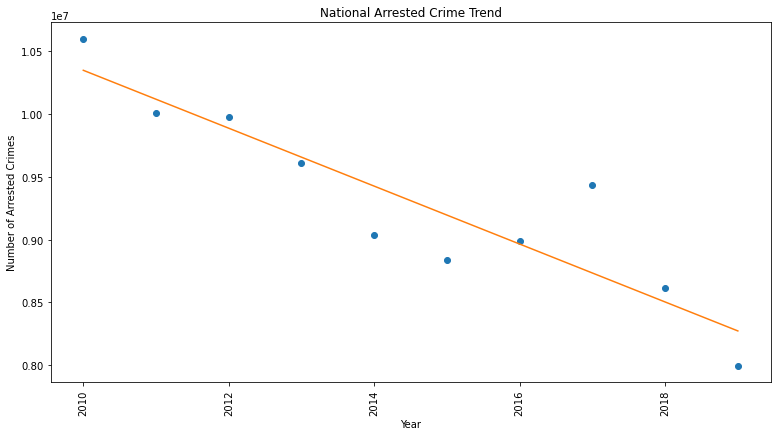

In [311]:
#Plot crime arrest data trend over the last 10 years
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=sum_arrested_per_year.index
y=sum_arrested_per_year['value']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#ax.scatter(x,y)
ax.set_title('National Arrested Crime Trend')
ax.set_ylabel("Number of Arrested Crimes")
ax.set_xlabel("Year")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

# Look at National Trends in Number of Officers

In [314]:
#Pull data from the website on employment of officers by state
#https://api.usa.gov/crime/fbi/sapi/api/police-employment/states/MO/2010/2019?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv


# base url for getting api data
base_url = "https://api.usa.gov/crime/fbi/sapi/"
#Create a list of states in order to request data from each state
stateAbbr = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
#declare the start and end year for the time period that we want to look at
since = '2010'
until = '2019'

#create an empty dataframe
employment_data = pd.DataFrame(columns=[])

#Create a for loop to request data for each state and for each variable for the offense that we would like to look at.
for i in stateAbbr:
    desired_endpoint = "api/police-employment/states/" + i + '/' + since + '/' + until
    req = requests.get(base_url + desired_endpoint+'?api_key='+API_KEY).json()
    new = pd.DataFrame(req["results"])
    #Create new columns in the dataframe so that we know what data corresponds to each state and variable.
    new['State'] = i
    #Append the data from each request to the dataframe
    employment_data = employment_data.append(new)    

In [315]:
employment_data.head()

,data_year,civilian_ct,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,population,total_pe_ct,state_id,state_name,state_abbr,agency_count_pe_submitting,csv_header,pe_ct_per_1000,State
0,2010,5424,3354,808,4162,2070,10434,12504,4792630,16666,2,Alabama,AL,365,None,3.48,AL
1,2011,5701,3587,801,4388,2114,10668,12782,4815348,17170,2,Alabama,AL,378,None,3.57,AL
2,2012,5806,3584,809,4393,2222,10400,12622,4834334,17015,2,Alabama,AL,385,None,3.52,AL
3,2013,5818,3684,805,4489,2134,10681,12815,4845981,17304,2,Alabama,AL,379,None,3.57,AL
4,2014,5655,3591,829,4420,2064,10613,12677,4861676,17097,2,Alabama,AL,372,None,3.52,AL


In [320]:
#Group data by year
employment_data_grouped_by_year = employment_data.groupby("data_year")
#find the sum of the values (total_pe_ct) per year
sum_employment_per_year = employment_data_grouped_by_year.sum()
sum_employment_per_year.head()

,civilian_ct,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,population,total_pe_ct,state_id,agency_count_pe_submitting,pe_ct_per_1000
data_year,,,,,,,,,,,,
2010,329066,199803,88139,287942,129263,664497,793760,313562507,1081702,1466,16449,162.87
2011,329173,199657,98019,297676,129516,663545,793061,316558322,1090737,1466,16466,166.62
2012,324404,194626,86878,281504,129778,656673,786451,319057545,1067955,1466,16610,159.27
2013,320024,193776,85341,279117,126248,656741,782989,321306227,1062106,1466,16652,156.85
2014,325136,194201,86793,280994,130935,656210,787145,324076206,1068139,1466,16619,158.35


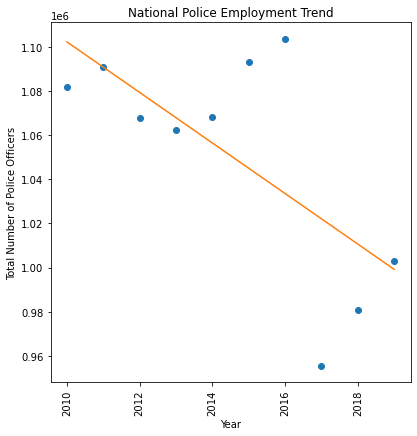

In [336]:
#Plot crime arrest data trend over the last 10 years
#Plot crime arrest data trend over the last 10 years
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=sum_employment_per_year.index
y=sum_employment_per_year['total_pe_ct']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#ax.scatter(x,y)
ax.set_title('National Police Employment Trend')
ax.set_ylabel("Total Number of Police Officers")
ax.set_xlabel("Year")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,2)
plt.show()

# Find National Correlation Between Number of Officers and Arrests

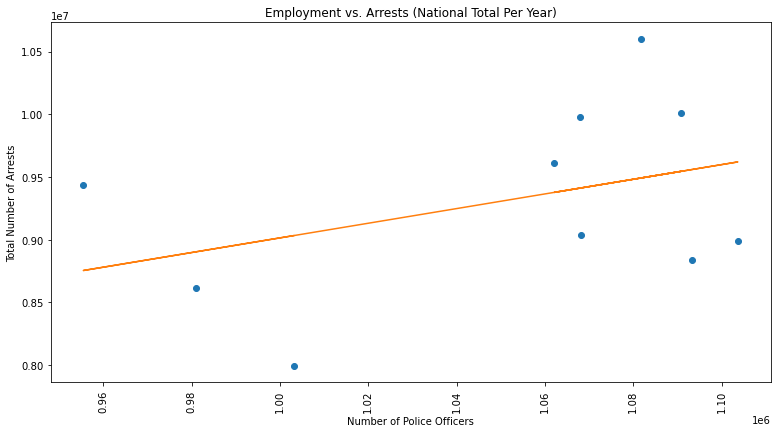

In [341]:
#Find correlation between number of officers and total number of arrests. 

#graph scatter plot of total officers per year vs. total arrests per year
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=sum_employment_per_year['total_pe_ct']
y=sum_arrested_per_year['value']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#ax.scatter(x,y)
ax.set_title('Employment vs. Arrests (National Total Per Year)')
ax.set_ylabel("Total Number of Arrests")
ax.set_xlabel("Number of Police Officers")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [347]:
#Find the correlation between the two
corr_employ_vs_arrests = sum_employment_per_year['total_pe_ct'].corr(sum_arrested_per_year['value'], method='pearson')
print(corr_employ_vs_arrests)

0.39254682119903445


In [ ]:
#There is a weak positive correlation between the total number of national police officers per year and the total number of national arrests per year.

#In order to get more data points, I'm going to now look at the break down by states instead of national total. 